In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt
import string
from scipy import stats
from matplotlib.patches import Rectangle

# Load files

In [2]:
threes = pd.read_csv('data/3-points.csv')
assists = pd.read_csv('data/assists.csv')
blocks = pd.read_csv('data/blocks.csv')
fg = pd.read_csv('data/field-goals.csv')
fouls = pd.read_csv('data/fouls.csv')
ft = pd.read_csv('data/free-throws.csv')
rebs = pd.read_csv('data/rebounds.csv')
steals = pd.read_csv('data/steals.csv')
to = pd.read_csv('data/turnovers.csv')

# Build super set of all stats from selected two files

In [3]:
def build_super_set(df, df2): 
    dfNew = pd.merge(df, df2, on='PLAYER')
    print dfNew.columns
    return remove_null_rows(dfNew)

# Remove null rows

In [4]:
def remove_null_rows(df): 
    mask = (df['PLAYER'] != 'PER GAME') & (df['PLAYER'] != 'PLAYER')
    df=df[mask]
    return df

# Build small set with only two selected stats

In [5]:
def build_small_set(df, col_1, col_2):
    columns=df.columns
    small_set = pd.DataFrame(columns=columns)
    small_set = small_set.fillna(0) # with 0s rather than NaNs
    small_set['dim1_scaled']=stats.zscore(df[col_1].astype(float))
    small_set['dim2_scaled']=stats.zscore(df[col_2].astype(float))
    return small_set

# Get list of player names

In [6]:
def get_player_list(df): 
    return list(df['PLAYER'])

# Build the scatter plot

In [7]:
def output_graph(df_,labels,z, x_label, y_label, q1, q2, q3, q4, ):
    graph = sb.jointplot(x=df_['dim1_scaled'], y=df_['dim2_scaled'], xlim=(-3.5,3.5), ylim=(-3.5,3.5), color='#214b5e')

    graph.fig.set_figwidth(14)
    graph.fig.set_figheight(14)

    ax = graph.ax_joint
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_title('Z-Score = '+str(z),fontsize= 18)
    ax.set_aspect('equal')
    ax.grid(color='#f1f1f1')
    ax.set_facecolor('white')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.add_patch(Rectangle((-z, -z), 2*z, 2*z, alpha=0.15,facecolor="grey"))

    # label players: blue for exceptional on X, red for Y, purple for both
    for label, x, y in zip(labels, df_['dim1_scaled'], df_['dim2_scaled']): 
        if (x < -z or y < -z) and (x > z or y > z): 
            ax.annotate(label.encode('utf-8'), xy=(x, y), color='#6139a3')
        elif x > z or x < -z: 
            ax.annotate(label.encode('utf-8'), xy=(x, y), color='#325bad')
        elif y > z or y < -z: 
            ax.annotate(label.encode('utf-8'), xy=(x, y), color='#ce2c29')

    #quad 1 - high x and y 
    ax.annotate(q1, xy=(1.5, 3.5),weight='bold')
    #quad 2 - low x high y
    ax.annotate(q2, xy=(-2.5, 3.5),weight='bold')
    #quad 3 - low x and y 
    ax.annotate(q3, xy=(-2.5, -3.5),weight='bold')
    #quad 4 - high x low y
    ax.annotate(q4, xy=(1.5, -3.5),weight='bold')

Index([u'RK_x', u'PLAYER', u'TEAM_x', u'GP_x', u'MPG_x', u'OFF', u'ORPG',
       u'DEF', u'DRPG', u'REB', u'RPG', u'RP48', u'RK_y', u'TEAM_y', u'GP_y',
       u'MPG_y', u'STL', u'STPG', u'STP48M', u'TO', u'TOPG', u'PF', u'ST/TO',
       u'ST/PF'],
      dtype='object')


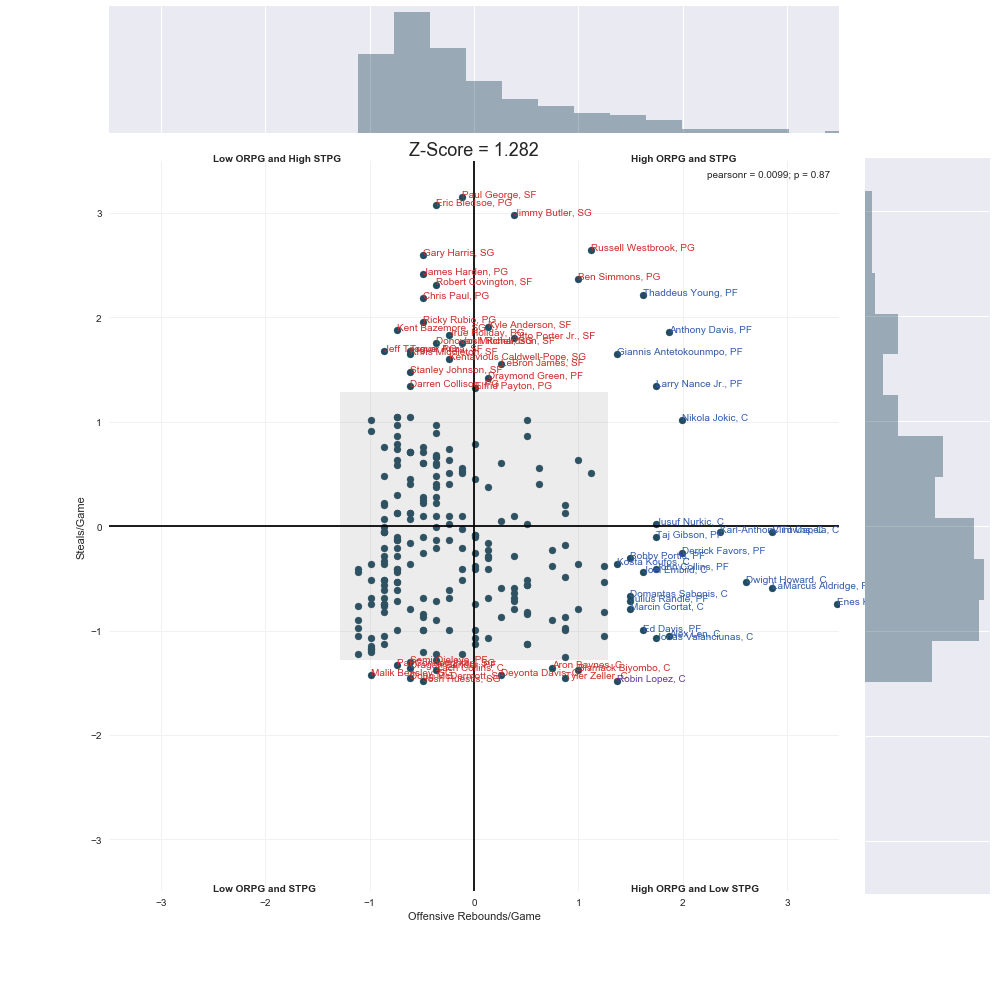

In [43]:
# 90th - 1.282
# 95th - 1.645 
# 99th - 2.326
super_set = build_super_set(rebs,steals)
small_set = build_small_set(super_set, 'ORPG', 'STPG')
player_list = get_player_list(super_set)
output_graph(small_set, player_list, 1.282,'Offensive Rebounds/Game','Steals/Game','High ORPG and STPG','Low ORPG and High STPG','Low ORPG and STPG','High ORPG and Low STPG')